# A study for Games data from year 1980 to 2020 including:
- Basic insighs and correlation between varibales
- Visulization for trends in games and platform in games histroy


## Improting liabraies

In [110]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

import seaborn as sns
sns.set_style("dark")
%matplotlib inline


### Importing Dataset

In [113]:
df = pd.read_csv('vgsales.csv')
df.columns=["rank","name","platform","year","genre","publisher","na_sales","eu_sales","jp_sales","other_sales","global_sales"]
# first 5 rows to have an overview
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### In this data set there are 11 columns. Their names and data types as follows:
- Rank - Ranking of overall sales, integer
- Name - The games name, object
- Platform - Platform of the games 
- Year - Year of the game's release, float
- Genre - Genre of the game ,object
- Publisher - Publisher of the game
- NA_Sales - Sales in North America
- EU_Sales - Sales in Europe
- JP_Sales - Sales in Japan 
- Other_Sales - Sales in the rest of the world
- Global_Sales - Total worldwide sales

## Initial data exploration

In [118]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [132]:
df.corr(method ='pearson') 

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
na_sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
eu_sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
jp_sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
other_sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
global_sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


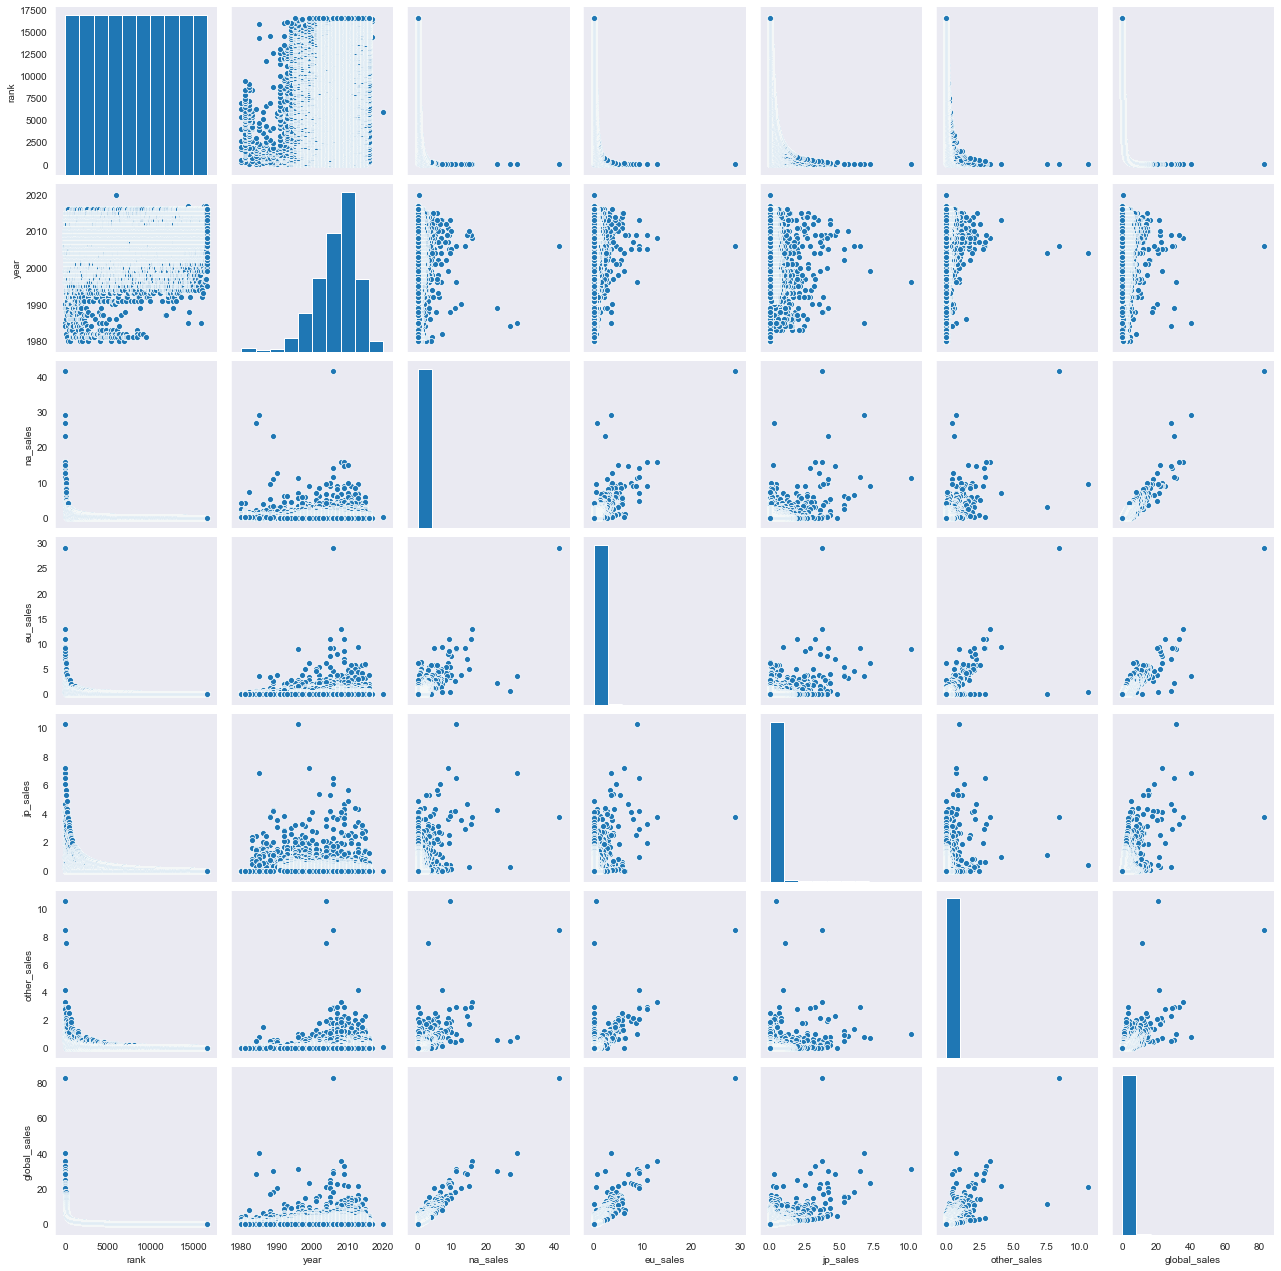

In [171]:
sns.pairplot(df)

In [172]:
#Checking the max year in the Dataframe
year_data = df['year']
print("Max Year Value: ", year_data.min())

Max Year Value:  1980.0


In [126]:
#Filling the missing values
df.isnull().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [120]:
/# best Genre
best_genre = df[['genre', 'global_sales']]
best_genre.groupby('genre').sum()

,global_sales
genre,
Action,1751.18
Adventure,239.04
Fighting,448.91
Misc,809.96
Platform,831.37
Puzzle,244.95
Racing,732.04
Role-Playing,927.37
Shooter,1037.37


Text(0.5, 1.0, 'Comparison between Global Sales for every Genre')

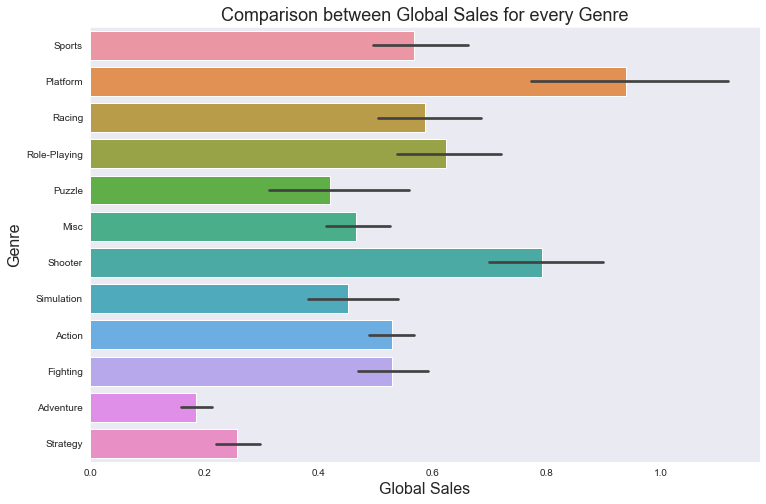

In [122]:
# pie plot to illustrate the diffrence
plt.figure(figsize=(12,8))
colors = sb.color_palette("muted")
ax = sns.barplot(data = best_genre, y = best_genre.genre, x= best_genre.global_sales)
ax.set_xlabel(xlabel='Global Sales', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title('Comparison between Global Sales for every Genre', fontsize=18)

### Best Globa Sales year

In [123]:
best_year = df[['year', 'global_sales']]
best_year.groupby('global_sales')

Text(0.5, 1.0, 'Best Revenue Per Game by Year in $ Millions')

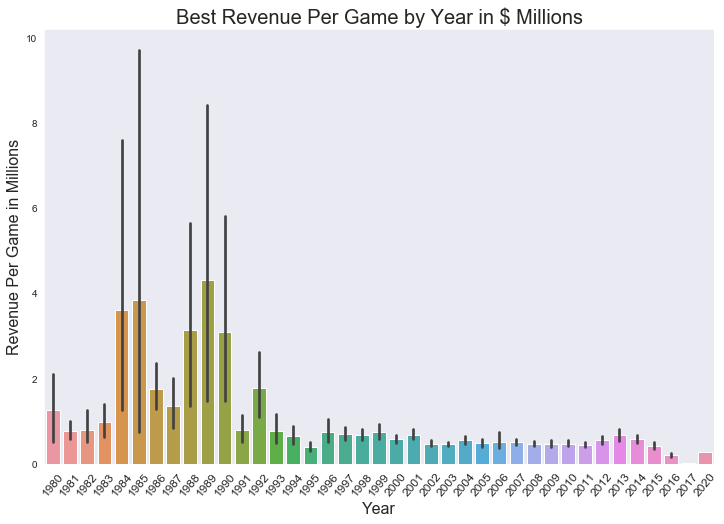

In [125]:
plt.figure(figsize=(12,8))

ax = sns.barplot(data = best_year, x=best_year.year, y = best_year.global_sales)
ax.set_xticklabels(labels=years, fontsize=12, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Revenue Per Game in Millions', fontsize=16)
ax.set_title(label='Best Revenue Per Game by Year in $ Millions', fontsize=20)

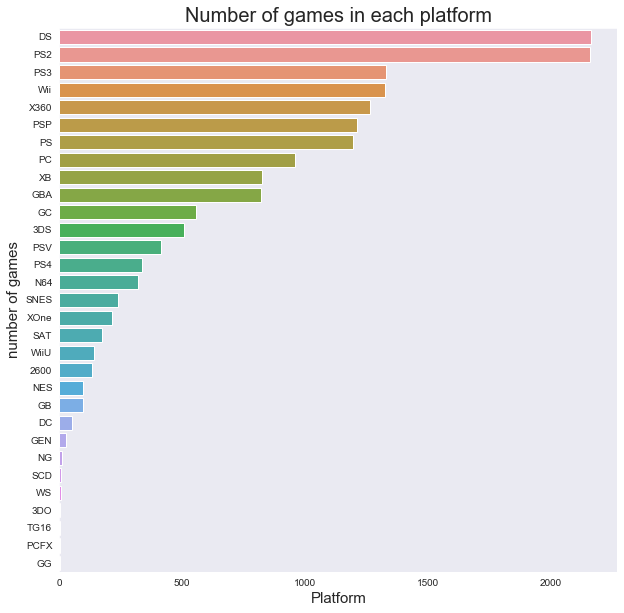

In [170]:
plat_pop = pd.crosstab(df.platform,df.genre)
plat_pop_total = plat_pop.sum(axis=1).sort_values(ascending= False)
plt.figure(figsize=(10, 10))
ax = sns.barplot(y = plat_pop_total.index, x = plat_pop_total.values)
ax.set_xlabel(xlabel ='Platform', fontsize= 15 )
ax.set_ylabel(ylabel ='number of games', fontsize= 15 )
ax.set_title(label='Number of games in each platform', fontsize=20)
plt.show()
